<a href="https://colab.research.google.com/github/ManasPhanse/Geeky/blob/master/WP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import io
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (5).csv


Reading Extracted Weather Data (TEMPERATURE in Celsius)

In [ ]:
weather = pd.read_csv(io.BytesIO(uploaded["weatherHistory.csv"]), encoding= 'unicode_escape', index_col='Formatted Date')
weather

,Temperature (°C)
Formatted Date,
15-04-21,30.2
16-04-21,29.6
17-04-21,30.1
18-04-21,31.0
19-04-21,30.3
20-04-21,30.0
21-04-21,29.9
22-04-21,30.3
23-04-21,30.2


Plotting the Original Weather Data (Temperature)

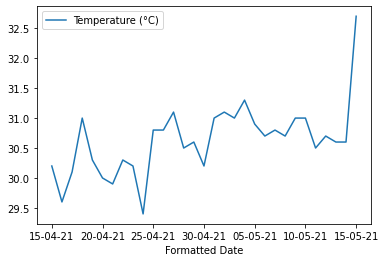

In [ ]:
weather.plot()

Training the Weather Data

In [ ]:
X = weather.values
train = X[0:12]
train = train.reshape(-1,1)
test = X[12:]
predictions = []

In [ ]:
train.size

12

Using Auto-Regression Algorithm for predictions

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [ ]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=12, end=30)

Results in NumPy Arrays

In [ ]:
test

array([[31.1],
       [30.5],
       [30.6],
       [30.2],
       [31. ],
       [31.1],
       [31. ],
       [31.3],
       [30.9],
       [30.7],
       [30.8],
       [30.7],
       [31. ],
       [31. ],
       [30.5],
       [30.7],
       [30.6],
       [30.6],
       [32.7]])

In [ ]:
predictions

array([29.44606108, 30.05884658, 30.33799159, 30.44046052, 29.56360108,
       29.72574295, 31.60086102, 29.65489461, 29.05806413, 31.01664663,
       30.40832491, 29.76919034, 29.23284129, 31.02161248, 31.34372748,
       27.85213198, 30.34561491, 31.96426788, 29.07045623])

Results in Graph

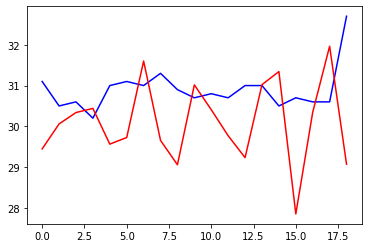

In [ ]:
plt.plot(test, color='blue')
plt.plot(predictions, color='red')

Measuring Accuracy

In [ ]:
acc = mean_squared_error (y_pred=predictions,y_true=test)

In [ ]:
acc

2.1912479346076474